In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
pip install xlrd>=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
path='C:\\Users\\Mayur\\Desktop\\Project Implementation\Sample - Superstore 2.xls'

In [4]:
df=pd.read_excel(path)

In [5]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2022-152156,2022-11-08 00:00:00,2022-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2022-152156,2022-11-08 00:00:00,2022-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2022-138688,2022-06-12 00:00:00,2022-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2021-108966,2021-10-11 00:00:00,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2021-108966,2021-10-11 00:00:00,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2020-110422,2020-01-21 00:00:00,2020-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2023-121258,2023-02-26 00:00:00,2023-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2023-121258,2023-02-26 00:00:00,2023-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2023-121258,2023-02-26 00:00:00,2023-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2022-152156,2022-11-08 00:00:00,2022-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2022-152156,2022-11-08 00:00:00,2022-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2022-138688,2022-06-12 00:00:00,2022-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2021-108966,2021-10-11 00:00:00,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2021-108966,2021-10-11 00:00:00,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date               object
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
set(df['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

In [9]:
furniture = df.loc[df['Category'] == 'Furniture']

In [10]:
furniture['Order Date'].min()

datetime.datetime(2020, 1, 6, 0, 0)

In [11]:
furniture['Order Date'].max()

datetime.datetime(2023, 12, 30, 0, 0)

In [12]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [13]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [14]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [15]:
furniture.head()

,Order Date,Sales
0,2020-01-06,2573.820
1,2020-01-07,76.728
2,2020-01-10,51.940
3,2020-01-11,9.940
4,2020-01-13,879.939


In [16]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2020-01-06', '2020-01-07', '2020-01-10', '2020-01-11',
               '2020-01-13', '2020-01-14', '2020-01-16', '2020-01-19',
               '2020-01-20', '2020-01-21',
               ...
               '2023-12-18', '2023-12-19', '2023-12-21', '2023-12-22',
               '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [17]:
y = furniture['Sales'].resample('MS').mean()

In [18]:
y['2023':]

Order Date
2023-01-01     397.602133
2023-02-01     528.179800
2023-03-01     544.672240
2023-04-01     453.297905
2023-05-01     678.302328
2023-06-01     826.460291
2023-07-01     562.524857
2023-08-01     857.881889
2023-09-01    1209.508583
2023-10-01     875.362728
2023-11-01    1277.817759
2023-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

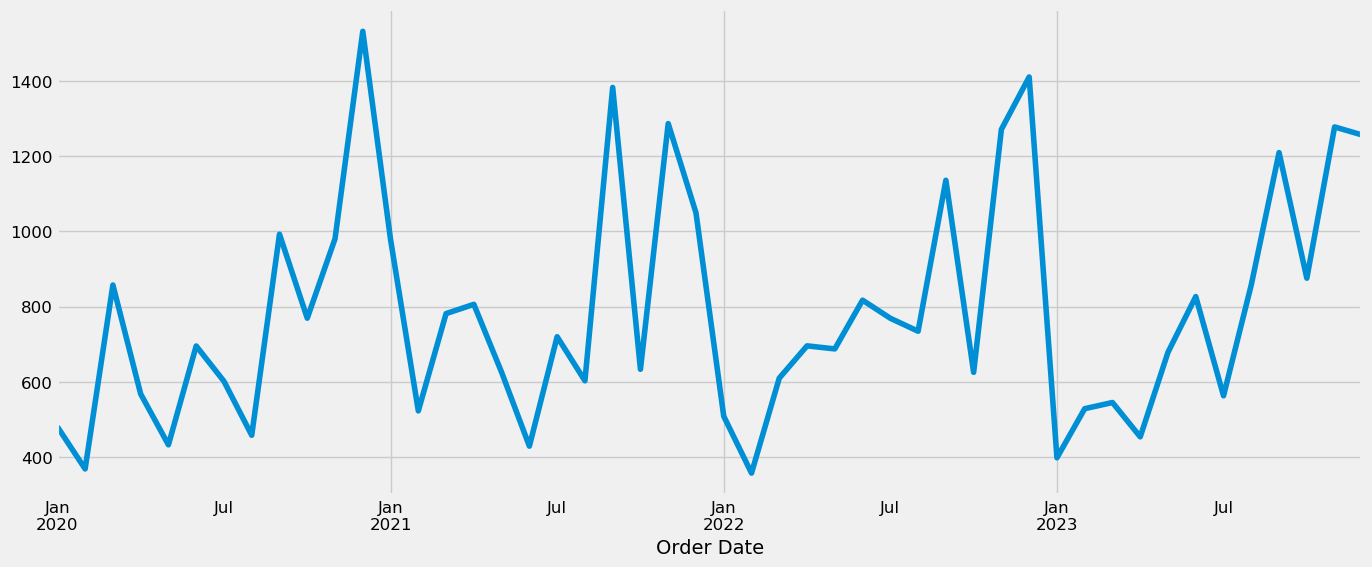

In [19]:
y.plot(figsize=(15, 6))
plt.show()

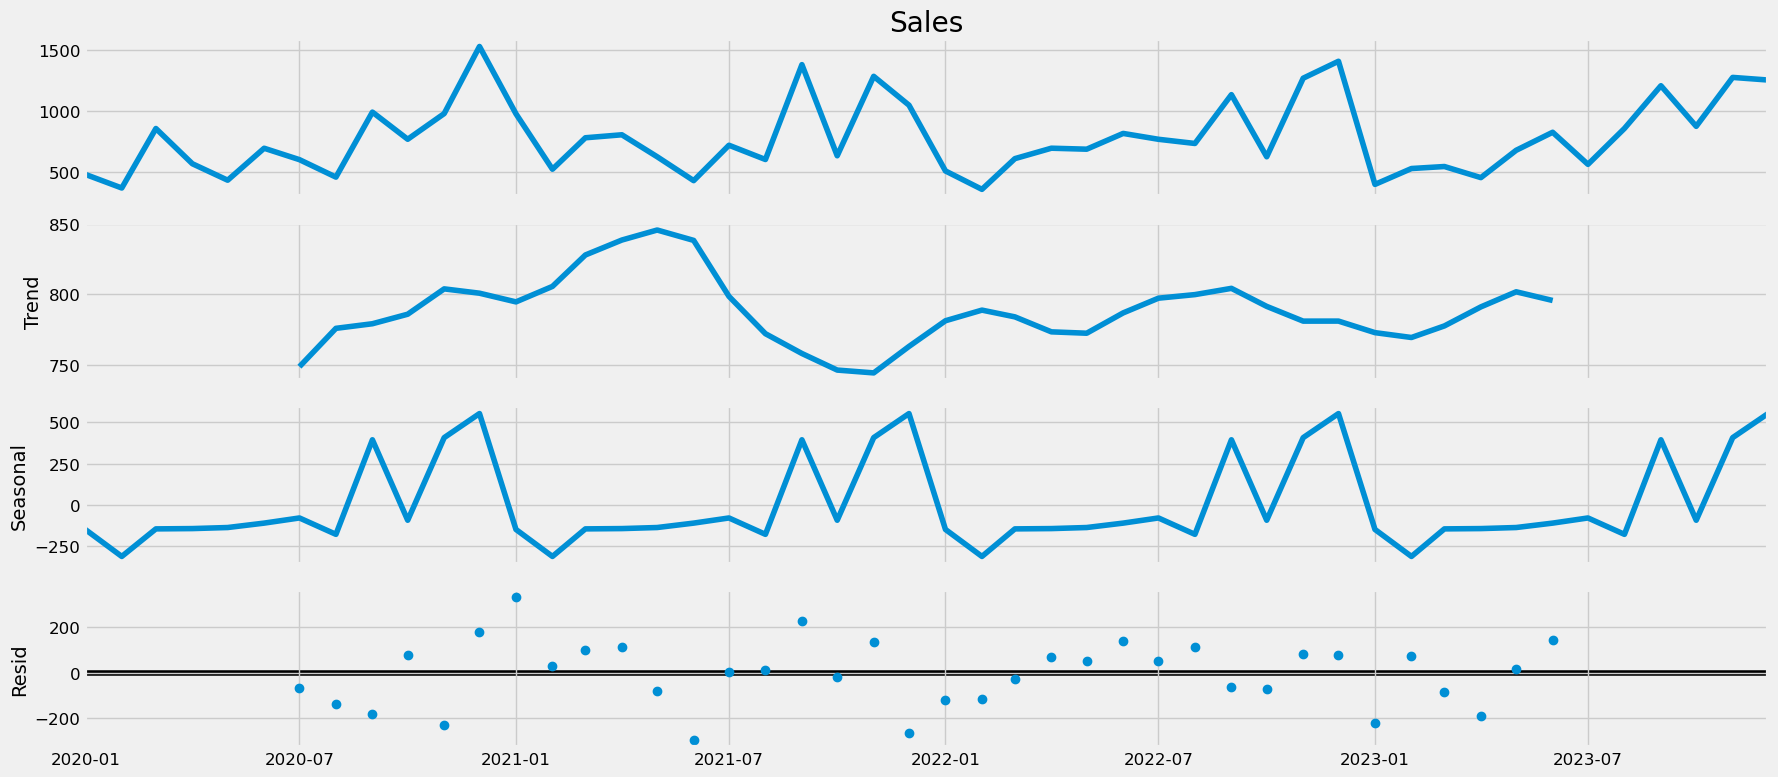

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [21]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

#             results = mod.fit()
#             results = mod.fit(maxiter=1000)
#             results = mod.fit(tol=1e-6)
            results = mod.fit(method='powell')


            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(f"Error for ARIMA{param}x{param_seasonal}12: {str(e)}")
            continue


Optimization terminated successfully.
         Current function value: 7.990435
         Iterations: 1
         Function evaluations: 10
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817513097701
Optimization terminated successfully.
         Current function value: 5.955095
         Iterations: 6
         Function evaluations: 255
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:575.6891292813011
Optimization terminated successfully.
         Current function value: 4.955386
         Iterations: 2
         Function evaluations: 33
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701293516736
Optimization terminated successfully.
         Current function value: 3.106982
         Iterations: 2
         Function evaluations: 46
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997438504
Optimization terminated successfully.
         Current function value: 5.137828
         Iterations: 1
         Function evaluations: 56
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 4.783714
         Iterations: 5
         Function evaluations: 251
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:469.2365461389275
Optimization terminated successfully.
         Current function value: 3.108409
         Iterations: 2
         Function evaluations: 78
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.4072401201262
Optimization terminated successfully.
         Current function value: 2.963301
         Iterations: 4
         Function evaluations: 207
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:294.4768594200011
Optimization terminated successfully.
         Current function value: 6.950535
         Iterations: 1
         Function evaluations: 65
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.25135475419
Optimization terminated successfully.
         Current function value: 5.121102
         Iterations: 5
         Function evaluations: 380
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:497.625829793113
Optimization terminated successfully.
  

In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
#                                 seasonal_order=(1, 1, 0, 12),
                                seasonal_order=(1, 1, 0, 11),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# results = mod.fit()
# results = mod.fit(maxiter=1000)
# results = mod.fit(tol=1e-6)
# results = mod.fit(method='powell')
# results = mod.fit(method='powell', maxiter=1000)
results = mod.fit(method='powell', xtol=1e-6)

print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 3.684922
         Iterations: 3
         Function evaluations: 141
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2144      0.311     -0.690      0.490      -0.824       0.395
ma.L1         -0.9994      0.260     -3.845      0.000      -1.509      -0.490
ar.S.L11      -0.2258      0.261     -0.863      0.388      -0.738       0.287
sigma2      1.359e+05   1.91e-06    7.1e+10      0.000    1.36e+05    1.36e+05


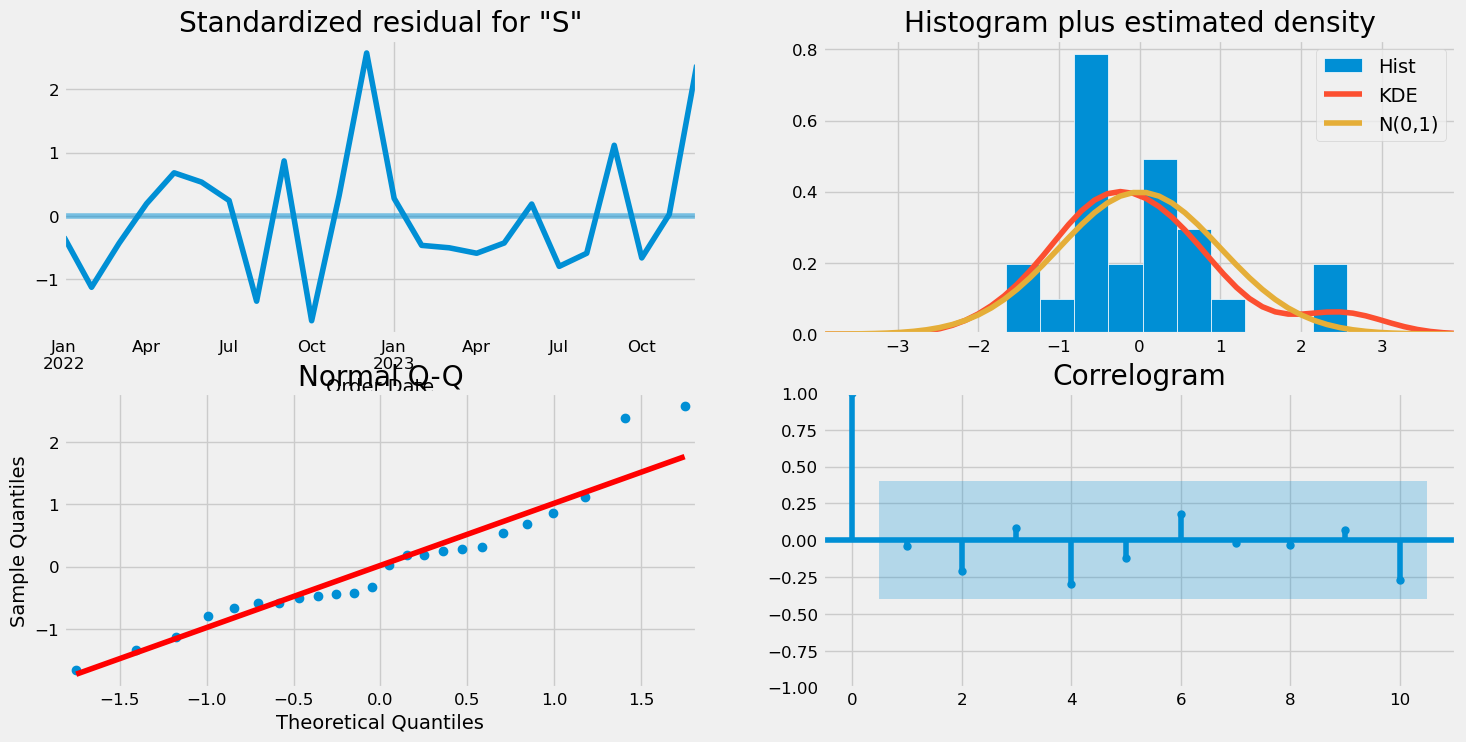

In [24]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

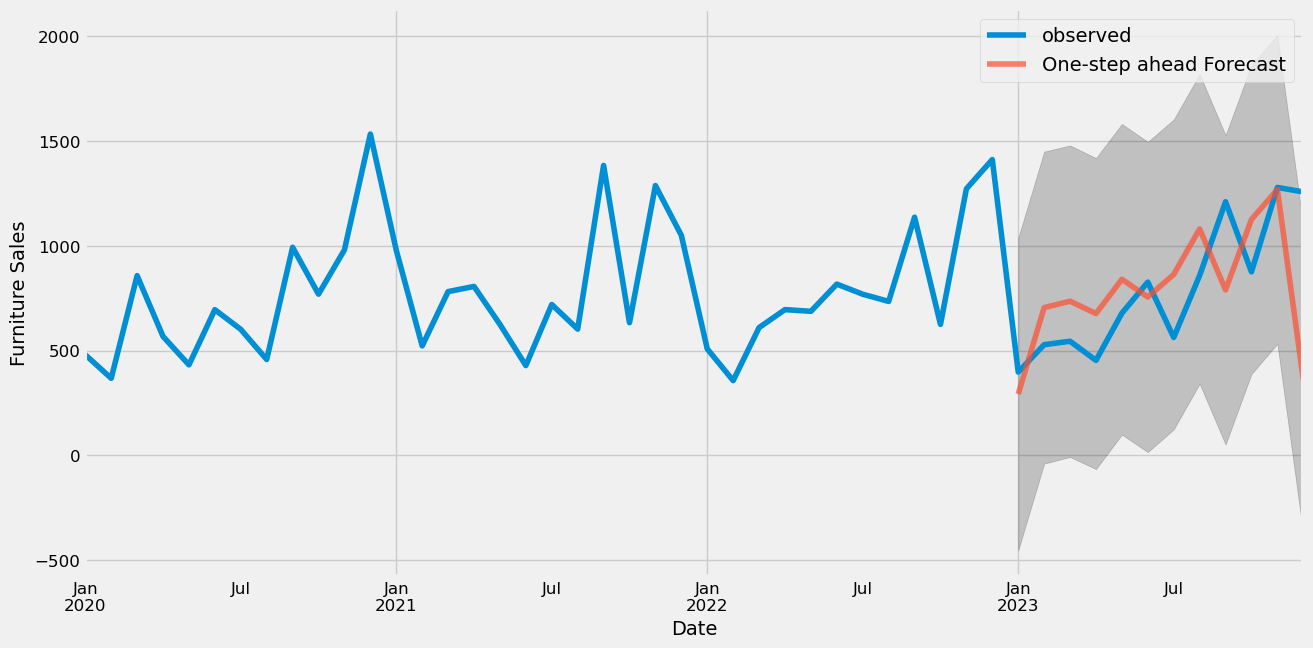

In [25]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)

pred_ci = pred.conf_int()

ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = y['2023-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 111652.5


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 334.14


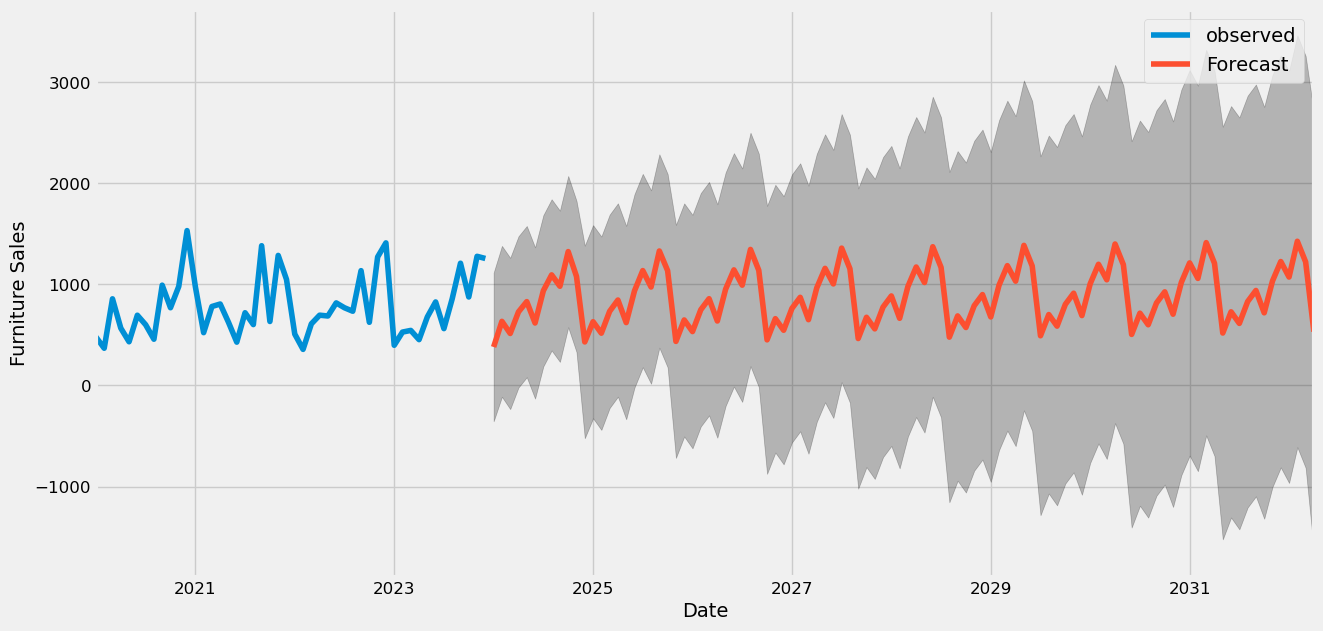

In [28]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [29]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']

In [30]:
furniture.shape, office.shape

((2121, 21), (6026, 21))